# Chapter 2 - Demo Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu, tiền xử lý dữ liệu

In [2]:
df = pd.read_csv('./Data/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3,30527.57,1407,3302,12
1,38628.37,3,30185.49,1025,4422,11
2,39715.16,1,32182.24,1498,3260,12
3,35593.30,5,29728.65,2340,4325,10
4,35128.18,4,30691.17,847,3774,11


In [5]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [6]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


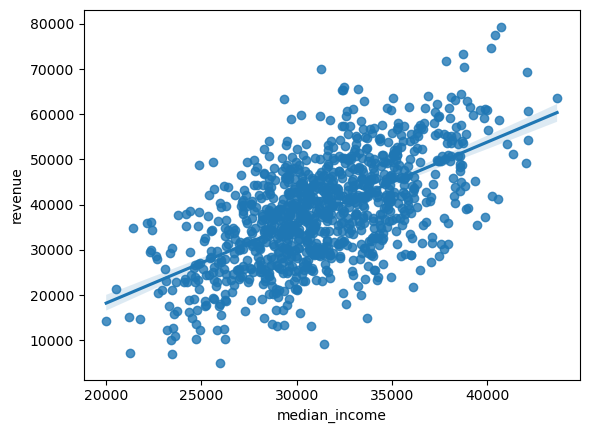

In [3]:
sns.regplot(data=df, x= 'median_income', y='revenue')
plt.show()

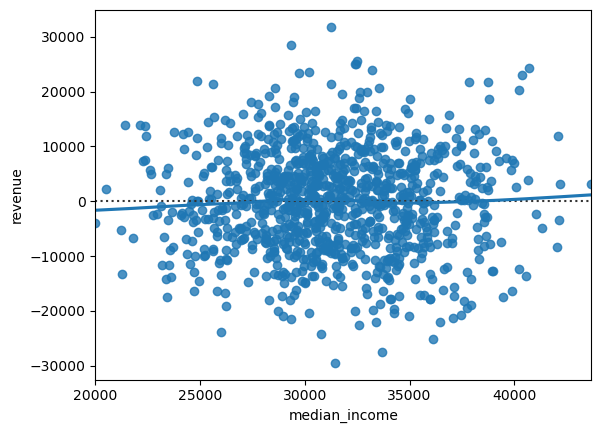

In [4]:
sns.residplot(x=df['median_income'], y=df['revenue'], lowess=True)
plt.show()

In [29]:
# Chuẩn bị dữ liệu training data/ test data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X1 = df[['median_income']]
y1 = df['revenue']

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

# Linear Regression
## Simple Linear Regression: Xây dựng & đánh giá model

In [33]:
# Load module, tạo đối tượng linear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [12]:
intercept = model.intercept_
slope = model.coef_[0]
print(intercept,slope)

-17944.393212607923 1.8044776691444888


In [37]:
y1_pred = model.predict(X1_test)

In [13]:
intercept = model.intercept_
slope = model.coef_[0]

In [39]:
print(intercept, slope)

-17944.393212607967 1.8044776691444901


In [40]:
# Đánh giá model

In [41]:
# R^2 cho toàn bộ dữ liệu
model.score(X1, y1)

0.3618738533973396

In [42]:
# R^2 khi train
model.score(X1_train, y1_train)

0.37376263809946475

In [43]:
# R^2 khi test
model.score(X1_test, y1_test)

0.3246804918433005

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
mse = mean_squared_error(y1_pred, y1_test)
print(mse)

90952579.47704405


In [46]:
mae = mean_absolute_error(y1_pred, y1_test)
print(mae)

7751.936386800821


- Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu. 
- Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế  và dự đoán.

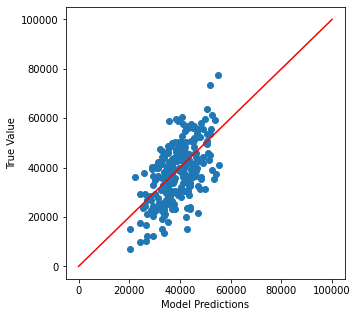

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X1_test),y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-', color = 'r')
plt.show()

## Multiple Linear Regression - Xây dựng & đánh giá model

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['median_income',
        'population_density',
        'location_age'
       ]]
y = df['revenue']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 1)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
print(model.intercept_)
print(model.coef_)

-52007.759174315586
[1.72599278e+00 4.12919678e+00 2.05221843e+03]


In [54]:
y_pred = model.predict(X_test)

In [55]:
# Đánh giá model

In [56]:
model.score(X, y)

0.7549353996442647

In [57]:
model.score(X_train, y_train)

0.7481587269103243

In [58]:
model.score(X_test, y_test)

0.7752549140633264

In [59]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

30019154.8063992


In [60]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

4417.183344512152


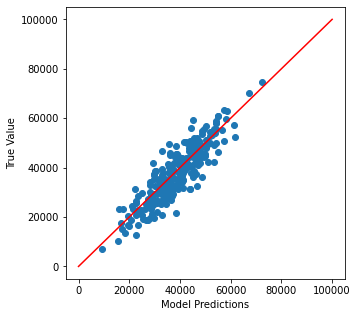

In [61]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], '-', color = 'r')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

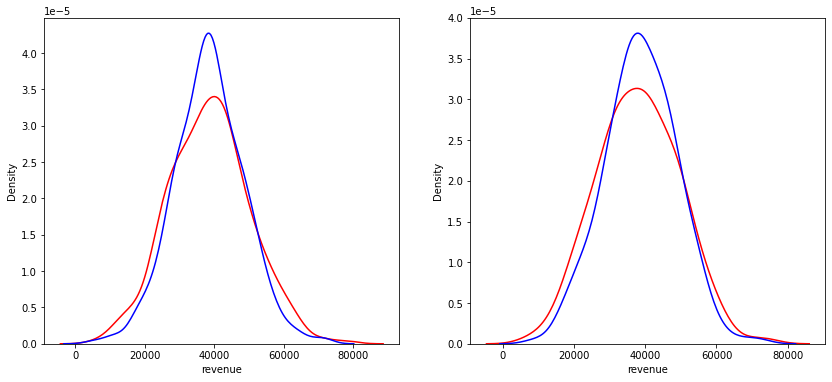

In [62]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()

In [65]:
X_new = pd.DataFrame({
    'median_income': [30000],
    'population_density': [2000],
    'location_age': [10]
})

In [66]:
y_new = model.predict(X_new)
print(y_new)

[28552.60212207]


In [67]:
from scipy.stats.stats import pearsonr

In [68]:
pearsonr(model.predict(X_test),y_test)

(0.8827946452027519, 2.4153320539659367e-83)

### Lựa chọn thuộc tính 

#### Sử dụng Selection K Best

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [70]:
# Apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [71]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# Sorting in descending order 
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)  

                Specs       Score
0       median_income  566.922357
2        location_age  439.125397
1  population_density  107.360798


In [72]:
# Correlation Matrix with Heatmap
corrmat = df.corr()

In [73]:
corrmat

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [74]:
top_corr_features = corrmat.index


In [75]:
import matplotlib
matplotlib.__version__

'3.3.4'

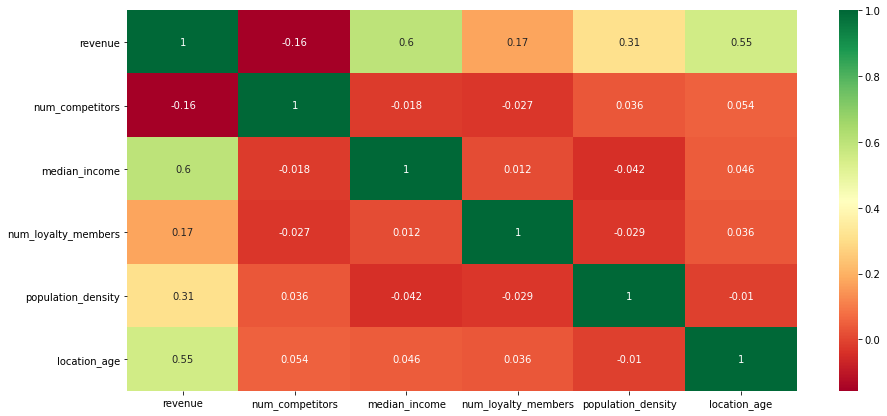

In [76]:
plt.figure(figsize=(15,7))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị
plt.show()

### Sau khi lựa chọn thuộc tính => áp dụng lại thuật toán

In [77]:
# 3 thuộc tính có score cao nhất
X2 = df[['median_income', 'population_density', 'location_age']]
y2 = df['revenue']

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 100)

In [79]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [80]:
model2.score(X2, y2)

0.7552028859956076

In [81]:
model2.score(X2_train, y2_train)

0.7526411491478369

In [82]:
model2.score(X2_test, y2_test)

0.7632552854044201

In [83]:
mean_squared_error(model2.predict(X2_test), y2_test)

30672514.389709026

In [84]:
mean_absolute_error(model2.predict(X2_test), y2_test)

4358.312766077768

# Polynormial Regression
## Simple Polynormial Regression - Xây dựng & đánh giá model

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
pr_1=PolynomialFeatures(degree=2)
pr_1

PolynomialFeatures()

In [87]:
X1_pr=pr_1.fit_transform(X1)


In [88]:
X1.shape, X1_pr.shape


((1000, 1), (1000, 3))

In [89]:
X1[:5]

,median_income
0,30527.57
1,30185.49
2,32182.24
3,29728.65
4,30691.17


In [90]:
X1_pr[:5]

array([[1.00000000e+00, 3.05275700e+04, 9.31932530e+08],
       [1.00000000e+00, 3.01854900e+04, 9.11163807e+08],
       [1.00000000e+00, 3.21822400e+04, 1.03569657e+09],
       [1.00000000e+00, 2.97286500e+04, 8.83792631e+08],
       [1.00000000e+00, 3.06911700e+04, 9.41947916e+08]])

In [91]:
X1_pr_train, X1_pr_test, y1_pr_train, y1_pr_test = train_test_split(X1_pr, y1, 
                                                                    random_state = 100)

In [103]:
lm1_t = LinearRegression()

In [104]:
lm1_t.fit(X1_pr_train, y1_pr_train)

LinearRegression()

In [105]:
lm1_t.score(X1_pr, y1)

0.36210890718691835

In [106]:
lm1_t.score(X1_pr_train, y1_pr_train)

0.3416162217276143

In [107]:
lm1_t.score(X1_pr_test, y1_pr_test)

0.4272645066562639

In [108]:
mean_squared_error(lm1_t.predict(X1_pr_test), y1_pr_test)

74203294.0042279

In [98]:
mean_absolute_error(lm1_t.predict(X1_pr_test), y1_pr_test)

7000.057817654782

## Multiple Polynormial Regression - Xây dựng & đánh giá model

In [109]:
pr2=PolynomialFeatures(degree=2)
pr2

PolynomialFeatures()

In [110]:
X2_pr=pr2.fit_transform(X2)

In [111]:
X2.shape, X2_pr.shape

((1000, 3), (1000, 10))

In [112]:
X2[:5]

,median_income,population_density,location_age
0,30527.57,3302.0,12.0
1,30185.49,4422.0,11.0
2,32182.24,3260.0,12.0
3,29728.65,4325.0,10.0
4,30691.17,3774.0,11.0


In [114]:
X2_pr[:2]

array([[1.00000000e+00, 3.05275700e+04, 3.30200000e+03, 1.20000000e+01,
        9.31932530e+08, 1.00802036e+08, 3.66330840e+05, 1.09032040e+07,
        3.96240000e+04, 1.44000000e+02],
       [1.00000000e+00, 3.01854900e+04, 4.42200000e+03, 1.10000000e+01,
        9.11163807e+08, 1.33480237e+08, 3.32040390e+05, 1.95540840e+07,
        4.86420000e+04, 1.21000000e+02]])

In [115]:
X2_pr_train, X2_pr_test, y2_pr_train, y2_pr_test = train_test_split(X2_pr, y2, 
                                                                    random_state = 100)

In [117]:
lm2_t = LinearRegression()

In [118]:
lm2_t.fit(X2_pr_train, y2_pr_train)

LinearRegression()

In [119]:
lm2_t.score(X2_pr, y2)

0.7575929999543383

In [121]:
lm2_t.score(X2_pr_train, y2_pr_train)

0.758092420422708

In [122]:
lm2_t.score(X2_pr_test, y2_pr_test)

0.7558605048424545

In [ ]:
mean_squared_error(lm2_t.predict(X_pr_test), y_pr_test)

In [ ]:
mean_absolute_error(lm2_t.predict(X_pr_test), y_pr_test)